# Recipe 1: Handling Complex Data Structures

In this section, we'll explore how to handle complex data structures within a pandas DataFrame. Specifically, we will focus on the 'genres' column in the 'artists_with_genres' dataset, which contains lists of genres for each artist. Our goal is to transform these lists into a more manageable structure for analysis.

In [7]:
import pandas as pd


In [8]:
artists_with_genres = pd.read_csv('data/artists_with_genres.csv')

## Data Preparation and Cleaning

Before we begin analyzing the data, it's crucial to clean and prepare it. This involves removing entries that don't have associated genres and ensuring our data is in the correct format for analysis.

In [9]:
# Removing artists without genres
artists_with_genres = artists_with_genres[artists_with_genres['genres'] != 'No genre found for this artist']
artists_with_genres = artists_with_genres[artists_with_genres['genres'] != '[]']

## Exploding Nested Lists

The 'explode' method in pandas is incredibly useful for dealing with columns that contain lists. By 'exploding' these lists, we can transform each element into a separate row, making the data easier to analyze.

In [10]:
import ast
artists_with_genres['genres'] = artists_with_genres['genres'].apply(ast.literal_eval)
artists_with_genres_exploded = artists_with_genres.explode('genres')

Now we have some actual data we can work with. We can group by genre and find the top listed genres:

In [15]:
genre_totals = artists_with_genres_exploded.groupby('genres')['mins_played'].sum()
# Sort the values and select top 10 genres for the viz
top_genres = genre_totals.sort_values(ascending=False).head(10)
top_genres

genres
pov: indie         45997.525317
rap                20944.388267
small room         19843.297333
bedroom pop        19261.112017
alternative emo    19009.134033
emo                18888.427450
bubblegrunge       16570.068900
pop                15793.443133
indie pop          15420.125350
lo-fi emo          14329.553100
Name: mins_played, dtype: float64

# Recipe 2: Combining and Reshaping Data

In this section, we delve into the techniques of merging/joining different datasets and reshaping data using pivot tables. Merging is a process where we combine two datasets based on a common attribute, enriching our data for deeper analysis. Pivot tables help us summarize and reorganize our data, making it easier to draw insights. We will use the 'artists_with_genres' and 'songs' datasets to demonstrate these concepts.

In [16]:
songs = pd.read_csv('data/songs_with_audio_features.csv')

## Merging Data

Merging datasets is a fundamental technique in data analysis, allowing us to combine information from different sources. There are various types of merges such as:
- **Inner Merge**: Combines records that have matching values in both datasets.
- **Outer Merge**: Includes all records from both datasets, filling in NaNs for missing matches.
- **Left/Right Merge**: Includes all records from the left/right dataset and the matched records from the other dataset.

In our case, we'll demonstrate an example of an inner merge.

In [ ]:
# 'artist name' is the common key in both datasets. We can merge on that column. 
merged_data = pd.merge(songs, artists_with_genres_exploded,how = 'inner',on='artist name')

## Creating Pivot Tables

Pivot tables are powerful tools in pandas that allow us to reorganize, group, and summarize our data. They are particularly useful for statistical analysis. In our example, we will create a pivot table to analyze a specific attribute, like 'danceability', across different genres.

In [32]:
# Creating a pivot table
# This example calculates the average 'danceability' for each genre
pivot_table = merged_data.pivot_table(values='danceability', index='genres', aggfunc='mean')


In [33]:
pivot_table

,danceability
genres,
21st century classical,0.262250
5th wave emo,0.531017
8-bit,0.909000
a cappella,0.558839
abstract,0.398600
...,...
yugoslav new wave,0.510500
yugoslav rock,0.510500
zilizopendwa,0.750000


## Visualizing Data: Danceability by Genre with Matplotlib
After our analysis with pivot tables, the next step is to visualize our findings. Visualization is a key aspect of data science, helping to communicate insights and patterns effectively. We will use matplotlib, a popular Python library for creating visualizations in Python.

#### Steps in Creating Bar Charts with Matplotlib:

##### Sort the Data: 

We start by sorting our data. For our purpose, we sort the genres based on their average danceability scores in ascending order. This arrangement helps in better comparison across genres.


In [ ]:
least_danceable = pivot_table.sort_values(by='danceability', ascending = True).head(10)
most_danceable = pivot_table.sort_values(by='danceability', ascending = False).head(10)


##### Plotting the Data:

We use the plot method on our DataFrame. By specifying kind='bar', we indicate that we want a bar chart.
The sort_values function is crucial here as it determines the order in which the data will be displayed in the chart.
Setting the Title and Labels:

The title method is used to set the title of the chart. We create two charts, one showing the least danceable genres and the other showing the most danceable genres.
With xlabel and ylabel, we label the x-axis and y-axis, making the chart more informative and easier to understand.
Displaying the Chart:

Finally, the show method is called to display the chart. This method draws the chart and presents it in a format that is easy to interpret.

##### Implementing the Visualization:

First, we will create a bar chart to visualize the genres with the lowest average danceability scores (Least Danceable). Then, we'll create another chart for the genres with the highest average danceability scores (Most Danceable). These visualizations will help us understand which music genres are typically more or less conducive to dancing.



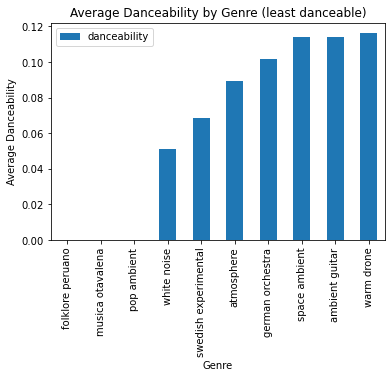

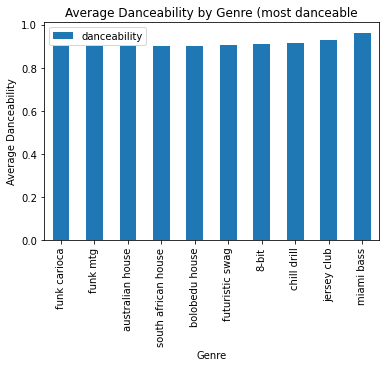

In [37]:
import matplotlib.pyplot as plt

least_danceable.sort_values('danceability', ascending=True).plot(kind='bar')
plt.title('Average Danceability by Genre (least danceable)')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.show()

most_danceable.sort_values('danceability', ascending=True).plot(kind='bar')
plt.title('Average Danceability by Genre (most danceable')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.show()